#### Importing necessary library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb


# Reading Data

In [2]:
#reading the training data
df=pd.read_csv('Train_Data.csv')

In [3]:
df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
0,y,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0
1,y,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1
3,x,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0
4,E,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0


In [4]:
df.shape

(22584, 19)

In [5]:
df.describe()

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,pred
count,22362.000000,22584.000000,22584.000000,22584.000000,22270.000000,22117.000000,22008.000000,21909.000000,21796.000000,21684.000000,21537.000000,21484.000000,21357.000000,21203.000000,21085.000000,20995.000000,22584.000000
mean,127.893905,78.002391,6.589621,65.664054,14.241585,123.207337,13.697683,183.894313,9.380175,199.786867,9.143454,169.239563,15.334764,122.868388,12.521853,168.530817,0.215772
std,39.078070,43.156539,3.360565,34.690224,0.801207,10.481427,0.798463,10.478648,0.800904,10.578785,0.799078,14.754047,1.214489,15.669803,0.923849,15.643776,0.411366
min,33.160000,0.000000,0.000000,0.000000,11.174400,84.084000,10.250400,133.507500,6.374400,159.778500,6.029600,100.170000,10.096000,54.253500,8.712000,95.970000,0.000000
25%,100.090000,42.000000,4.000000,42.000000,13.703200,116.067000,13.147200,176.809500,8.842200,192.651375,8.604000,159.715500,14.529600,112.365750,11.912000,158.109000,0.000000
50%,122.355000,73.500000,6.400000,63.000000,14.239200,123.207000,13.702400,183.949500,9.378800,199.741500,9.143200,169.359750,15.364000,123.007500,12.504000,168.441000,0.000000
75%,149.247500,105.000000,8.800000,84.000000,14.786400,130.357500,14.239200,190.932000,9.916000,206.944500,9.679200,178.741500,16.161600,133.465500,13.098400,179.361000,0.000000
max,385.860000,283.500000,23.200000,252.000000,17.199200,173.082000,17.140000,226.201500,12.335200,249.973500,12.329600,236.029500,20.512000,185.461500,18.170400,234.181500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22584 entries, 0 to 22583
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc      22584 non-null  object 
 1   ld      22362 non-null  float64
 2   m0      22584 non-null  float64
 3   m1      22584 non-null  float64
 4   m2      22584 non-null  float64
 5   m3      22270 non-null  float64
 6   m4      22117 non-null  float64
 7   m5      22008 non-null  float64
 8   m6      21909 non-null  float64
 9   m7      21796 non-null  float64
 10  m8      21684 non-null  float64
 11  m9      21537 non-null  float64
 12  m10     21484 non-null  float64
 13  m11     21357 non-null  float64
 14  m12     21203 non-null  float64
 15  m13     21085 non-null  float64
 16  m14     20995 non-null  float64
 17  ma      22584 non-null  object 
 18  pred    22584 non-null  int64  
dtypes: float64(16), int64(1), object(2)
memory usage: 3.3+ MB


### Observation from dataset

1. Dataset contains **22584 rows** and **19 columns**
2. From df.info it is clear that column **"pc"** and **"ma"** is **categorical variable** and else are continous variable
3. from "pred" column we can infer that its a 2 class **classification problem**
4. Also there are **missing values in 12 columns**
5. **mean** and **median** values are almost **close**

## handling missing values

In [7]:
df.isnull().sum()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

In [8]:
#Filling the missing values with mean value of the column

missing_columns = ['ld', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']
for column in missing_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [9]:
df.isnull().sum()

pc      0
ld      0
m0      0
m1      0
m2      0
m3      0
m4      0
m5      0
m6      0
m7      0
m8      0
m9      0
m10     0
m11     0
m12     0
m13     0
m14     0
ma      0
pred    0
dtype: int64

- **No missing values left**

## checking categorical variable

- **checking unique values in categorical variable**


In [10]:
#no. of categories in 'pc'column
df['pc'].unique()

array(['y', 'E', 'x', 'w', 'z'], dtype=object)

- **'pc' contains 5 categories**

In [11]:
#value count of each category in pc column
df['pc'].value_counts()

y    4915
E    4509
x    4414
z    4394
w    4352
Name: pc, dtype: int64

In [12]:
#no. of categories in 'ma'column
df['ma'].unique()

array(['m78', 'm76', 'm55', 'm75'], dtype=object)

- **'ma' contains 4 categories**

In [13]:
#value count of each category in ma column
df['ma'].value_counts()

m78    9267
m76    4509
m55    4414
m75    4394
Name: ma, dtype: int64

## Checking target variable

In [14]:
#no. of categories in 'pred'column
df['pred'].unique()

array([0, 1], dtype=int64)

- **Its 2 class classification problem**

## Balance or imbalanced dataset?

In [15]:
df['pred'].value_counts()

0    17711
1     4873
Name: pred, dtype: int64

In [16]:
percentage_0_class=(17711/(17711+4873))*100
percentage_0_class

78.4227771873893

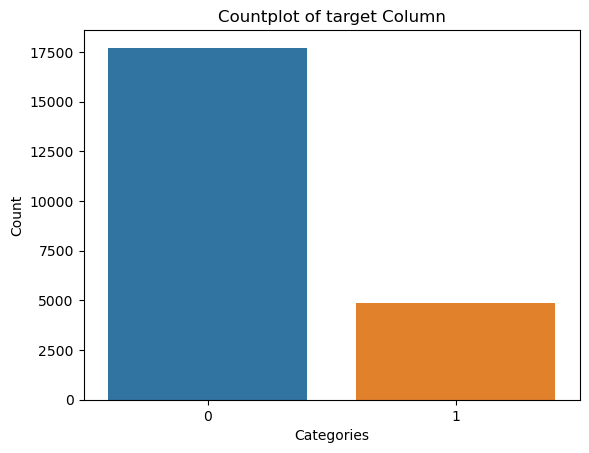

In [17]:
#visualising target variable
sns.countplot(data=df, x='pred')

plt.title('Countplot of target Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

## inference
- **we are provided with imbalanced dataset with 78.423% of data are from 0 class**

## onehot encoding of the categorical variable

In [18]:
categorical_columns = ['pc', 'ma']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [19]:
df_encoded

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,...,pred,pc_E,pc_w,pc_x,pc_y,pc_z,ma_m55,ma_m75,ma_m76,ma_m78
0,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,...,0,0,0,0,1,0,0,0,0,1
1,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,...,0,0,0,0,1,0,0,0,0,1
2,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,...,1,1,0,0,0,0,0,0,1,0
3,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,...,0,0,0,1,0,0,1,0,0,0
4,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,139.08,73.5,7.2,84.0,13.8016,115.9725,13.8856,189.0000,8.6536,196.7490,...,1,1,0,0,0,0,0,0,1,0
22580,156.74,63.0,5.6,105.0,13.6464,130.2000,12.4688,180.3690,10.6984,212.6355,...,1,0,0,1,0,0,1,0,0,0
22581,115.63,147.0,4.8,31.5,13.4344,115.5000,13.5752,190.8900,9.6144,219.6810,...,0,0,1,0,0,0,0,0,0,1
22582,216.26,105.0,4.8,31.5,13.8176,112.5285,13.2408,166.8555,9.0160,200.3610,...,0,0,0,0,1,0,0,0,0,1


### Split dataset into features and target variable

In [20]:
X = df_encoded.drop('pred', axis=1)
y = df_encoded['pred']

In [21]:
X.shape

(22584, 25)

In [22]:
y.shape

(22584,)

## Handling Imbalanced dataset

**Since the dataset is not large enough I'm going with random undersampling**

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
#implementing undersampling
rus = RandomUnderSampler(random_state=42)
X_res,y_res=rus.fit_resample(X, y)

In [25]:
X_res.shape,y_res.shape

((9746, 25), (9746,))

In [26]:
y_res.value_counts()

0    4873
1    4873
Name: pred, dtype: int64

- **Now the dataset has become balanced**

## checking on test data

In [27]:
df_test=pd.read_csv('Test_data.csv')

In [28]:
df_test.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


In [29]:
df_test.shape

(3986, 19)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3986 non-null   int64  
 1   pc      3986 non-null   object 
 2   ld      3958 non-null   float64
 3   m0      3986 non-null   float64
 4   m1      3986 non-null   float64
 5   m2      3986 non-null   float64
 6   m3      3919 non-null   float64
 7   m4      3915 non-null   float64
 8   m5      3886 non-null   float64
 9   m6      3865 non-null   float64
 10  m7      3837 non-null   float64
 11  m8      3838 non-null   float64
 12  m9      3806 non-null   float64
 13  m10     3786 non-null   float64
 14  m11     3745 non-null   float64
 15  m12     3766 non-null   float64
 16  m13     3711 non-null   float64
 17  m14     3701 non-null   float64
 18  ma      3986 non-null   object 
dtypes: float64(16), int64(1), object(2)
memory usage: 591.8+ KB


In [31]:
df_test.isnull().sum()

index      0
pc         0
ld        28
m0         0
m1         0
m2         0
m3        67
m4        71
m5       100
m6       121
m7       149
m8       148
m9       180
m10      200
m11      241
m12      220
m13      275
m14      285
ma         0
dtype: int64

In [32]:
#Filling the missing values with mean value of the column

missing_columns = ['ld', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']
for column in missing_columns:
    df_test[column].fillna(df[column].mean(), inplace=True)

In [33]:
df_test.isnull().sum()

index    0
pc       0
ld       0
m0       0
m1       0
m2       0
m3       0
m4       0
m5       0
m6       0
m7       0
m8       0
m9       0
m10      0
m11      0
m12      0
m13      0
m14      0
ma       0
dtype: int64

In [34]:
#saving index column
test_index=df_test['index'] 

In [35]:
#removing index column
df_test_no_index=df_test.drop('index',axis=1)
df_test_no_index.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.700800,166.1100,m76
1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.683200,177.7230,m78
2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.010400,185.6085,m78
3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.198400,180.2745,m75
4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,12.521853,157.6470,m55


In [36]:
#using get dummies for categorical column
categorical_columns = ['pc', 'ma']
X_test = pd.get_dummies(df_test_no_index, columns=categorical_columns)

In [37]:
X_test

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,...,m14,pc_E,pc_w,pc_x,pc_y,pc_z,ma_m55,ma_m75,ma_m76,ma_m78
0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,...,166.110000,1,0,0,0,0,0,0,1,0
1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,...,177.723000,0,0,0,1,0,0,0,0,1
2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,...,185.608500,0,1,0,0,0,0,0,0,1
3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,...,180.274500,0,0,0,0,1,0,1,0,0
4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,...,157.647000,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,109.45,126.0,4.0,94.5,14.6168,131.4495,13.1032,189.0840,8.3384,203.2275,...,180.043500,0,0,0,0,1,0,1,0,0
3982,188.31,136.5,1.6,21.0,12.9032,115.1535,14.3616,189.4830,7.6680,183.8865,...,204.550500,0,1,0,0,0,0,0,0,1
3983,80.99,31.5,4.8,115.5,15.0696,114.6810,14.0200,186.0810,9.2080,193.6200,...,168.530817,1,0,0,0,0,0,0,1,0
3984,120.64,42.0,0.8,126.0,13.8960,123.6585,13.5496,187.8975,9.7944,189.0525,...,164.241000,0,1,0,0,0,0,0,0,1


## Splitting the training dataset  

In [59]:
# splititng the dataset into train and validation set (80% train and 20% validation)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2,random_state=42)

<h1> Machine Learning Models</h1>

In [60]:
#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating f1-score we willl provide the array of probabilities belongs to each class
    print("F-1 score :",f1_score(test_y, sig_clf.predict(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [61]:
#This function plots the confusion matrices given y_i, y_i_hat
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 2,2 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [62]:
def report_F1_score(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict(test_x)
    return f1_score(test_y,sig_clf_probs)

## 1.Naive Bayes

#### 1.1. Hyper parameter tuning

for alpha = 1e-09
F1_score : 0.026422764227642278
for alpha = 1e-06
F1_score : 0.026422764227642278
for alpha = 0.001
F1_score : 0.030241935483870965
for alpha = 0.01
F1_score : 0.030272452068617558
for alpha = 0.1
F1_score : 0.030272452068617558
for alpha = 1
F1_score : 0.0303951367781155


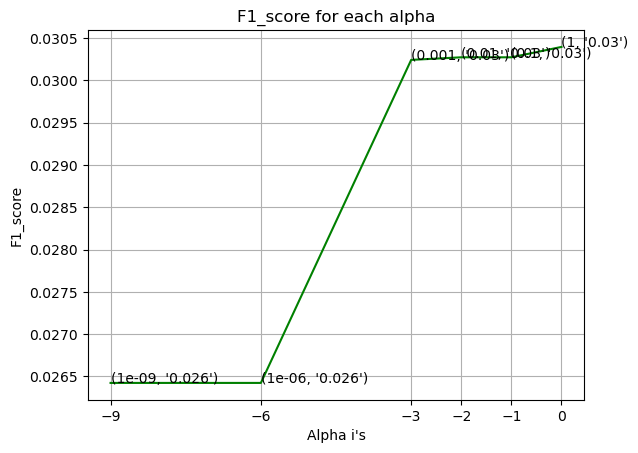

For values of best alpha =  1 The train f1_score is: 0.023886538940034834
For values of best alpha =  1 The cross validation f1_score is: 0.0303951367781155


In [63]:
alpha = [1e-9, 1e-6, 1e-3,0.01,0.1,1]
F1_score_array = []
for i in alpha:
    print("for alpha =", i)
    clf = GaussianNB(var_smoothing=i)
    clf.fit(train_X, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X, train_y)
    sig_clf_probs = sig_clf.predict(val_X)
    F1_score_array.append(f1_score(val_y, sig_clf_probs))
    print("F1_score :",f1_score(val_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), F1_score_array,c='g')
for i, txt in enumerate(np.round(F1_score_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),F1_score_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("F1_score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("F1_score")
plt.show()


best_alpha = np.argmax(F1_score_array)
clf = GaussianNB(var_smoothing=alpha[best_alpha])
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)


predict_y = sig_clf.predict(train_X)
print('For values of best alpha = ', alpha[best_alpha], "The train f1_score is:",f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation f1_score is:",f1_score(val_y, predict_y))


#### 1.2. Testing the model with best hyper paramters

F1_score : 0.0303951367781155
Number of missclassified point : 0.21186628293114898
-------------------- Confusion matrix --------------------


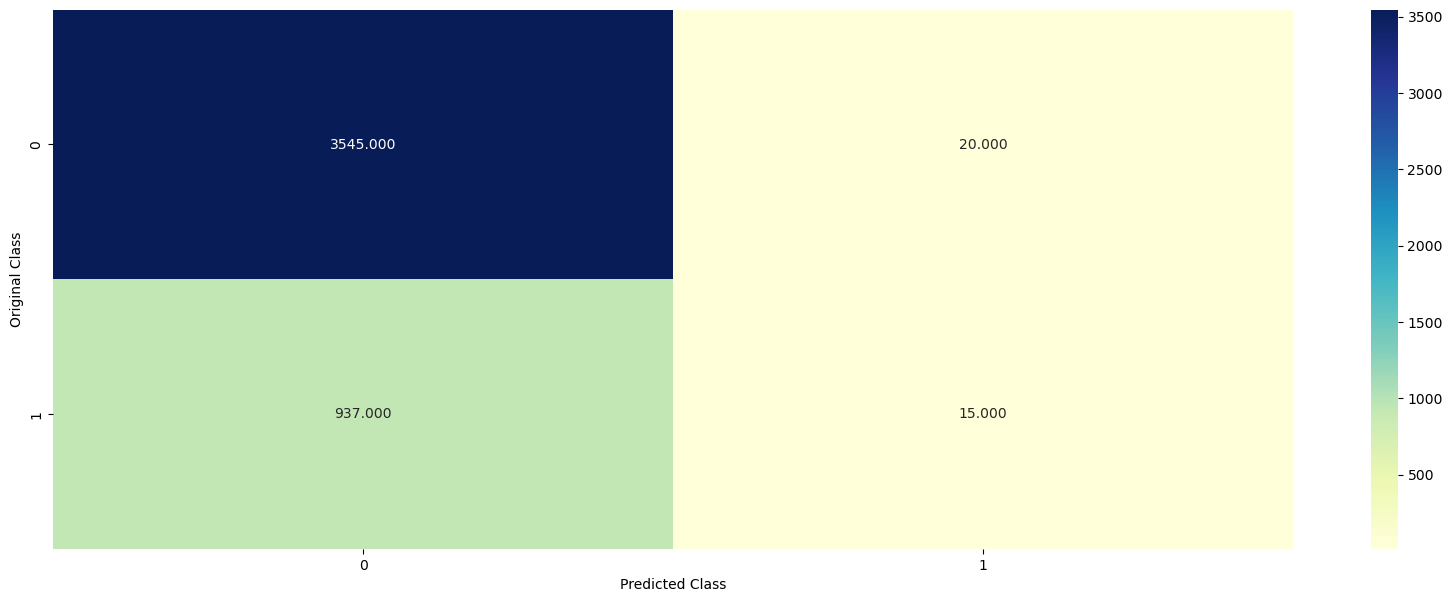

-------------------- Precision matrix (Columm Sum=1) --------------------


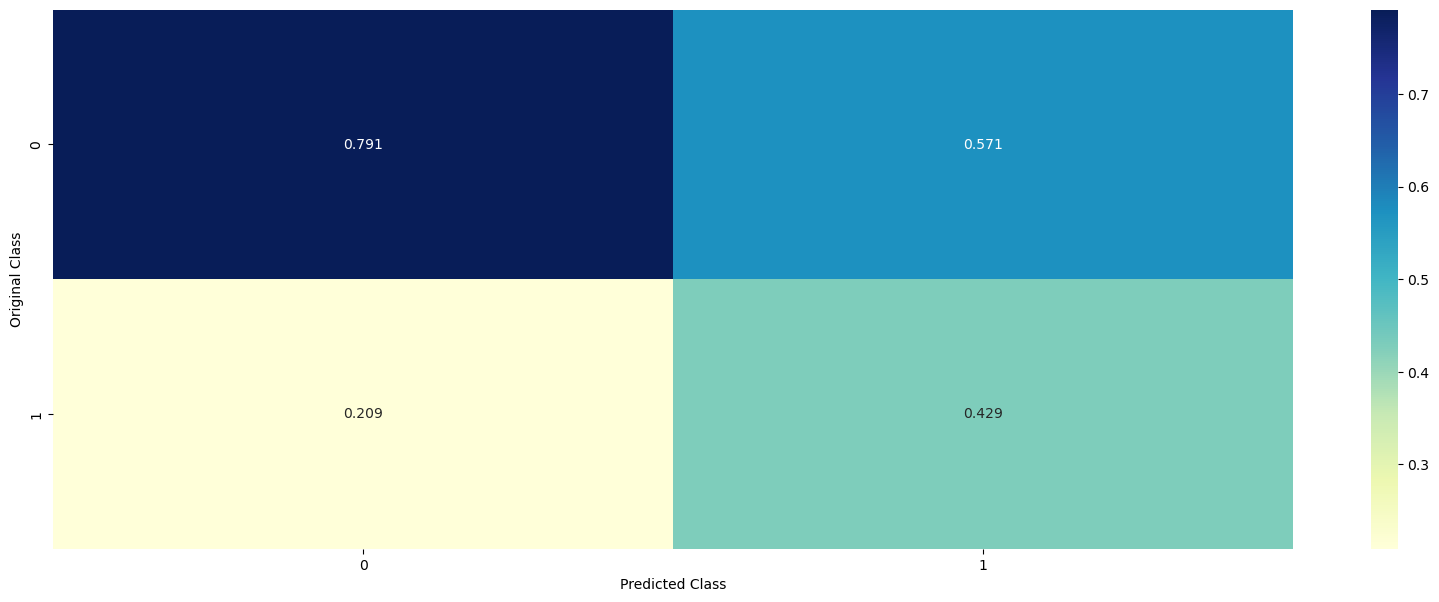

-------------------- Recall matrix (Row sum=1) --------------------


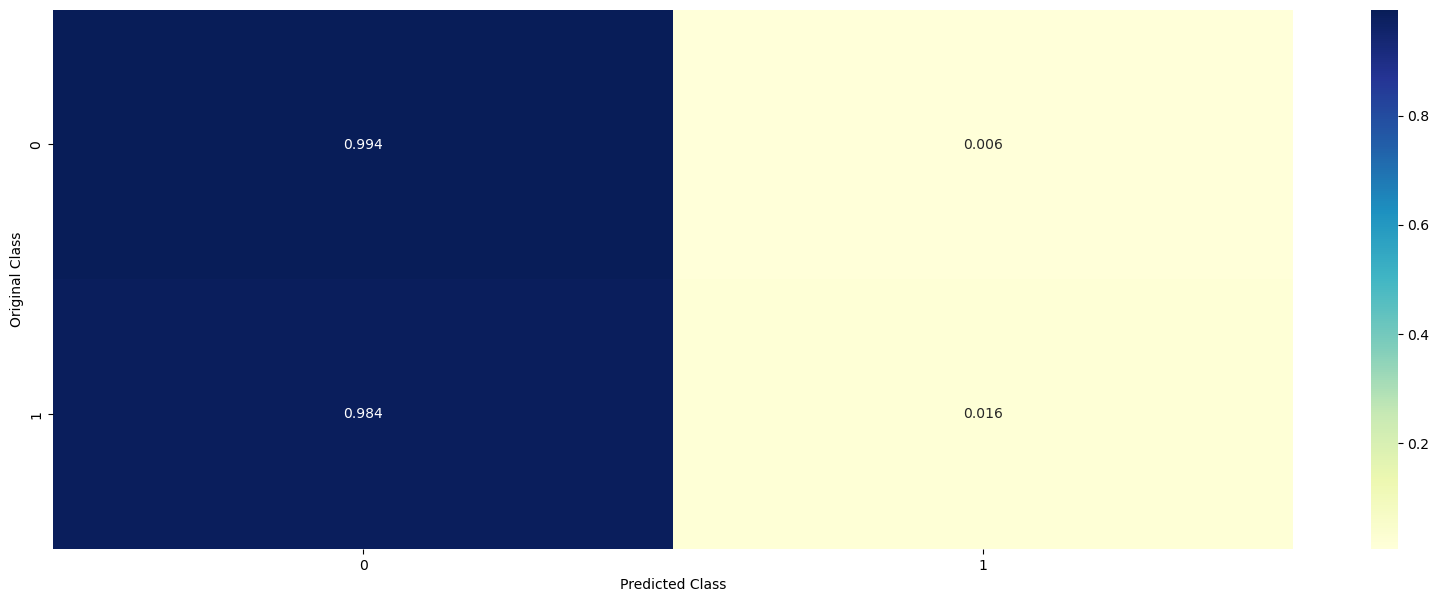

In [64]:
clf = GaussianNB(var_smoothing=alpha[best_alpha])
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)
sig_clf_probs = sig_clf.predict(val_X)

print("F1_score :",f1_score(val_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(val_X)- val_y))/val_y.shape[0])
plot_confusion_matrix(val_y, sig_clf.predict(val_X))

## 2. K Nearest Neighbour Classification

#### 2.1. Hyper parameter tuning

for alpha = 5
F1_score: 0.0
for alpha = 11
F1_score: 0.0
for alpha = 15
F1_score: 0.0
for alpha = 21
F1_score: 0.0
for alpha = 31
F1_score: 0.0
for alpha = 41
F1_score: 0.0
for alpha = 51
F1_score: 0.0
for alpha = 99
F1_score: 0.0


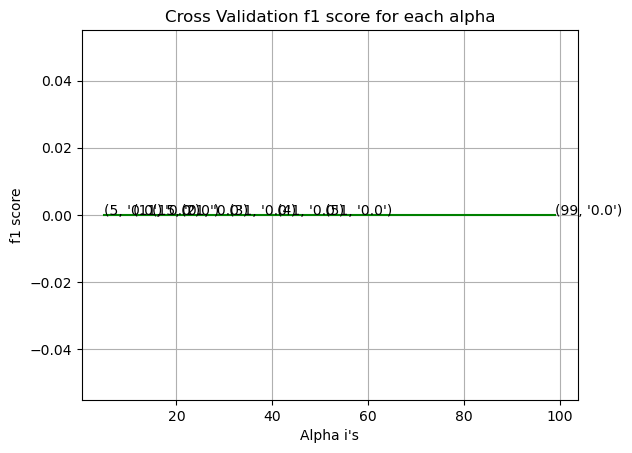

For values of best alpha = 5 The train f1_score is: 0.0
For values of best alpha = 5 The cross-validation f1_score is: 0.0


In [65]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
F1_score_array = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_X, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X, train_y)
    sig_clf_probs = sig_clf.predict(val_X)
    F1_score_array.append(f1_score(val_y, sig_clf_probs))
    print("F1_score:", f1_score(val_y, sig_clf_probs))

fig, ax = plt.subplots()
ax.plot(alpha, F1_score_array, c='g')

for i, txt in enumerate(np.round(F1_score_array, 3)):
    ax.annotate((alpha[i], str(txt)), (alpha[i], F1_score_array[i]))

plt.grid()
plt.title("Cross Validation f1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()

best_alpha = np.argmax(F1_score_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)

predict_y = sig_clf.predict(train_X)
print('For values of best alpha =', alpha[best_alpha], "The train f1_score is:", f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best alpha =', alpha[best_alpha], "The cross-validation f1_score is:", f1_score(val_y, predict_y))


#### 2.2. Testing the model with best hyper paramters

F-1 score : 0.0
Number of mis-classified points : 0.2107593535532433
-------------------- Confusion matrix --------------------


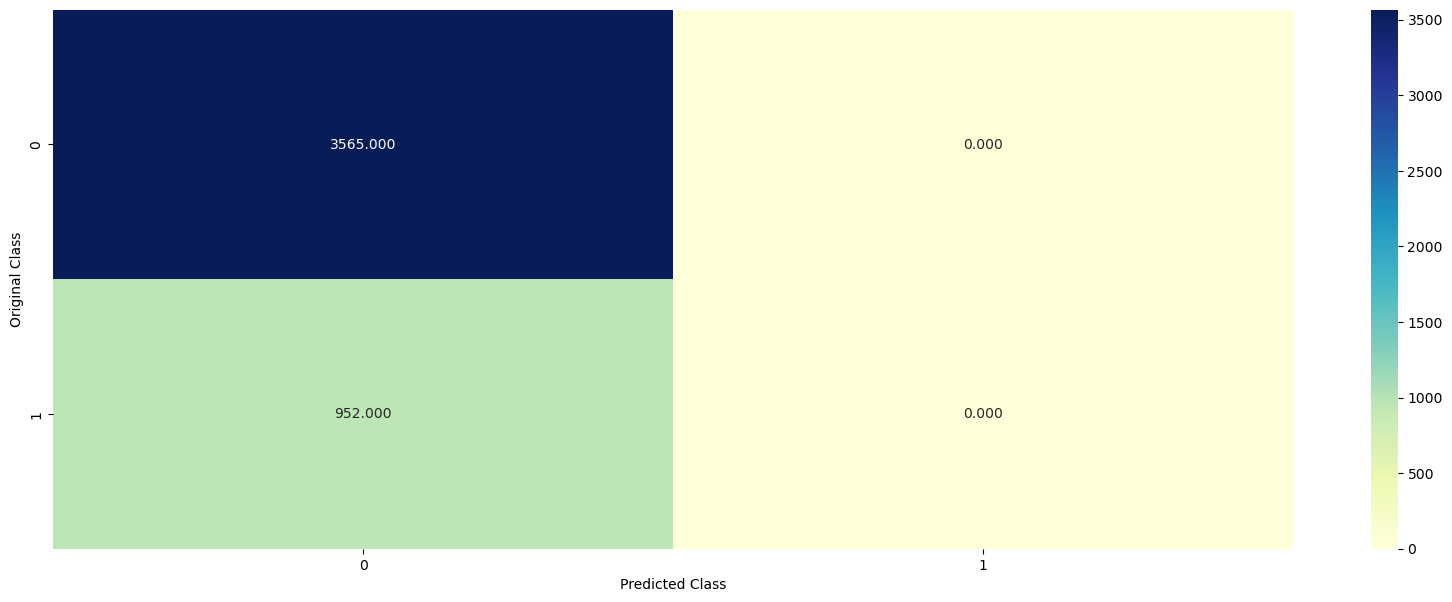

-------------------- Precision matrix (Columm Sum=1) --------------------


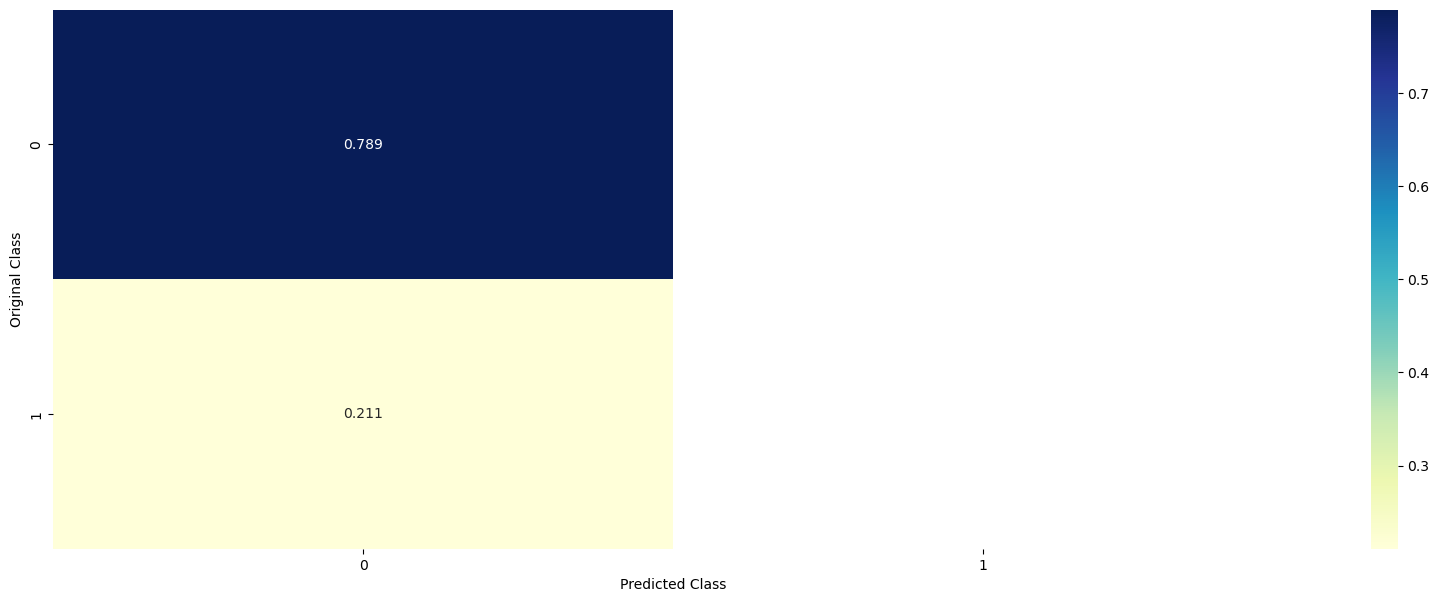

-------------------- Recall matrix (Row sum=1) --------------------


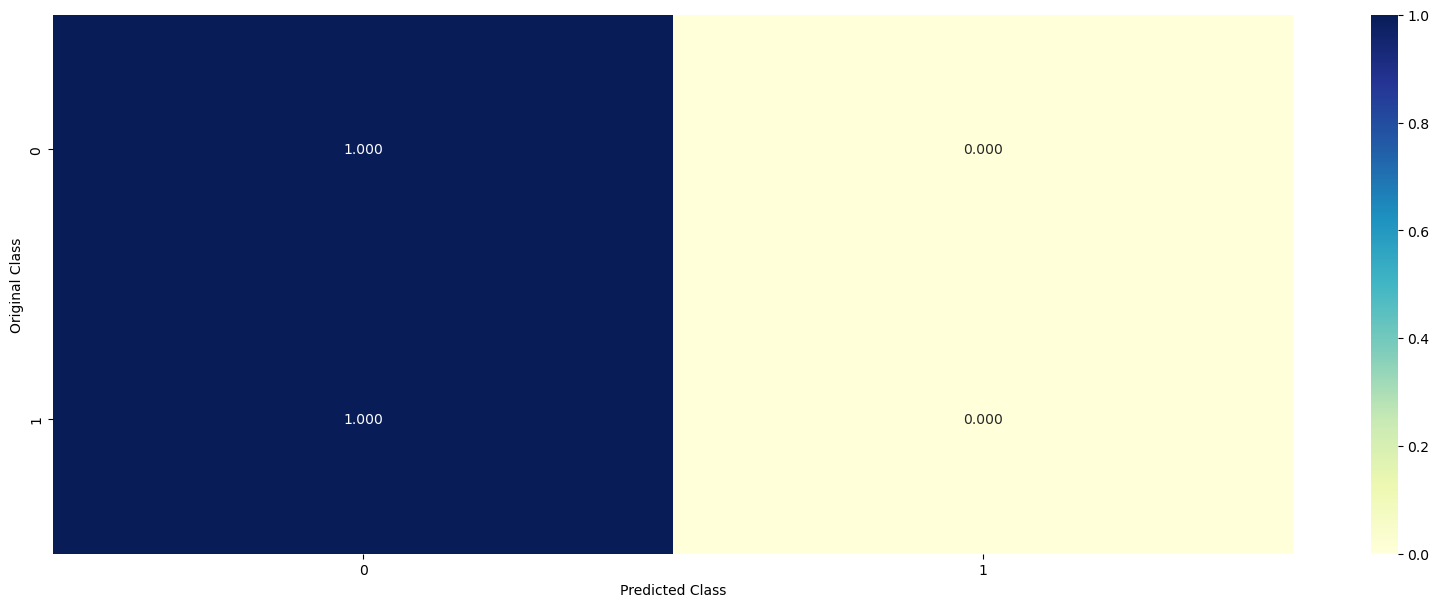

In [67]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_X, train_y, val_X, val_y, clf)

## 3. Logistic Regression

### 3.1. With Class balancing

#### 3.1.1. Hyper paramter tuning

for alpha = 1e-06
F1_score: 0.0
for alpha = 1e-05
F1_score: 0.0
for alpha = 0.0001
F1_score: 0.0
for alpha = 0.001
F1_score: 0.0
for alpha = 0.01
F1_score: 0.0
for alpha = 0.1
F1_score: 0.0
for alpha = 1
F1_score: 0.0041753653444676405
for alpha = 10
F1_score: 0.006250000000000001
for alpha = 100
F1_score: 0.006250000000000001


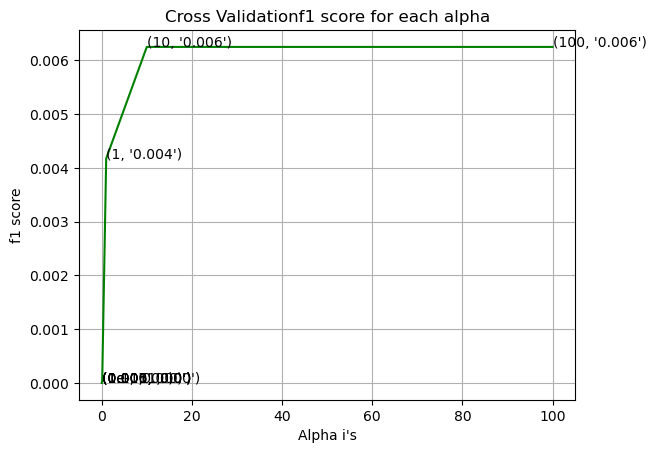

For values of best alpha =  10 The train f1_score is: 0.007088607594936709
For values of best alpha =  10 The cross-validation f1_score is: 0.006250000000000001


In [68]:
alpha = [10 ** x for x in range(-6, 3)]
F1_score_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_X, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X, train_y)
    sig_clf_probs = sig_clf.predict(val_X)
    F1_score_array.append(f1_score(val_y, sig_clf_probs))
    print("F1_score:", f1_score(val_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, F1_score_array,c='g')
for i, txt in enumerate(np.round(F1_score_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],F1_score_array[i]))
plt.grid()
plt.title("Cross Validationf1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()


best_alpha = np.argmax(F1_score_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)

predict_y = sig_clf.predict(train_X)
print('For values of best alpha = ', alpha[best_alpha], "The train f1_score is:", f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best alpha = ', alpha[best_alpha], "The cross-validation f1_score is:", f1_score(val_y, predict_y))

#### 3.1.2. Testing the model with best hyper paramters

F-1 score : 0.006250000000000001
Number of mis-classified points : 0.21120212530440557
-------------------- Confusion matrix --------------------


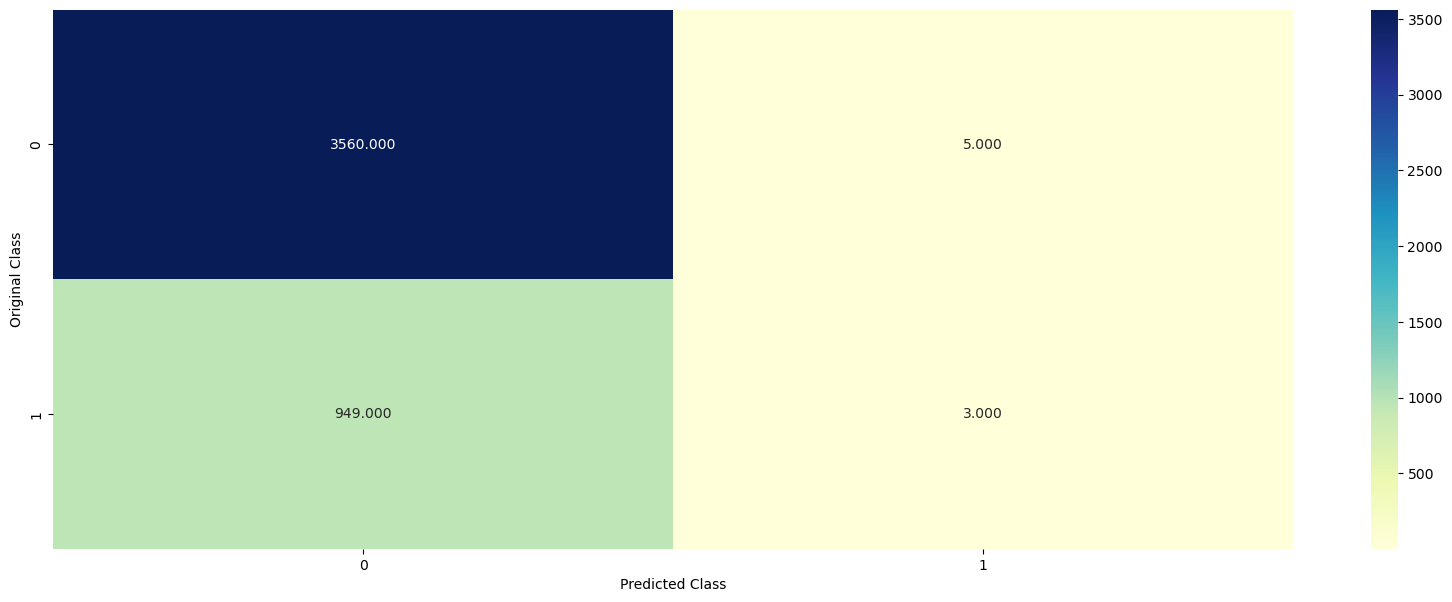

-------------------- Precision matrix (Columm Sum=1) --------------------


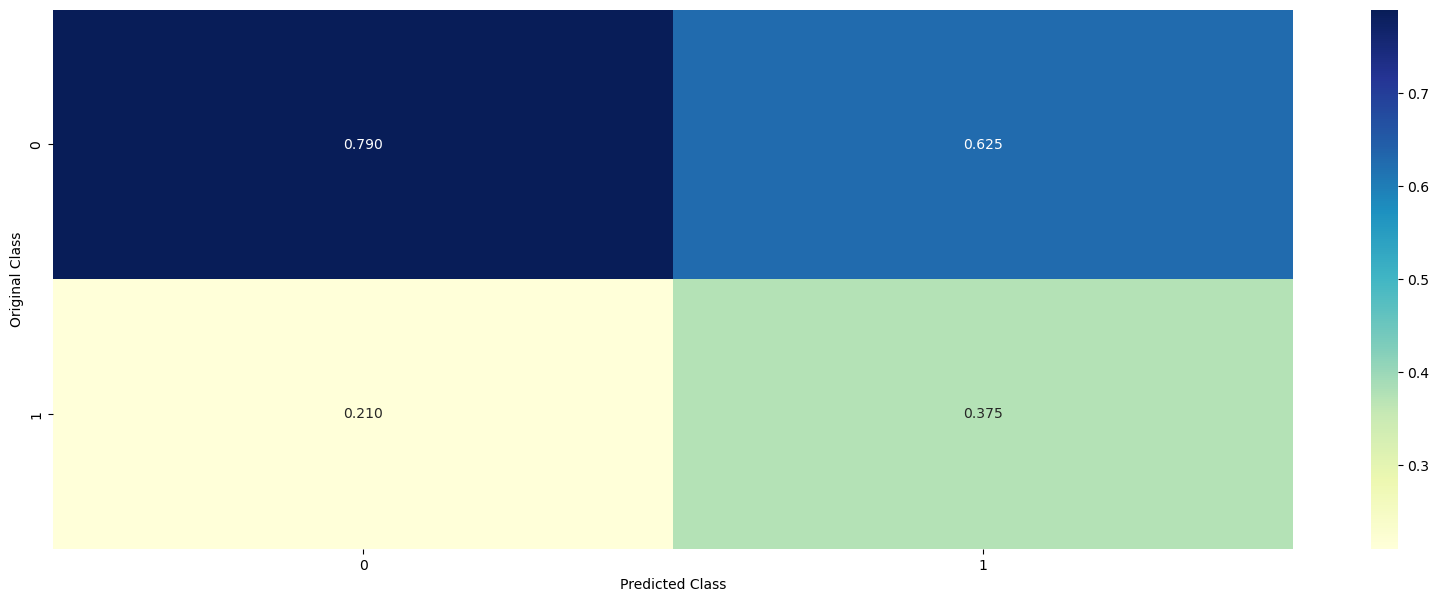

-------------------- Recall matrix (Row sum=1) --------------------


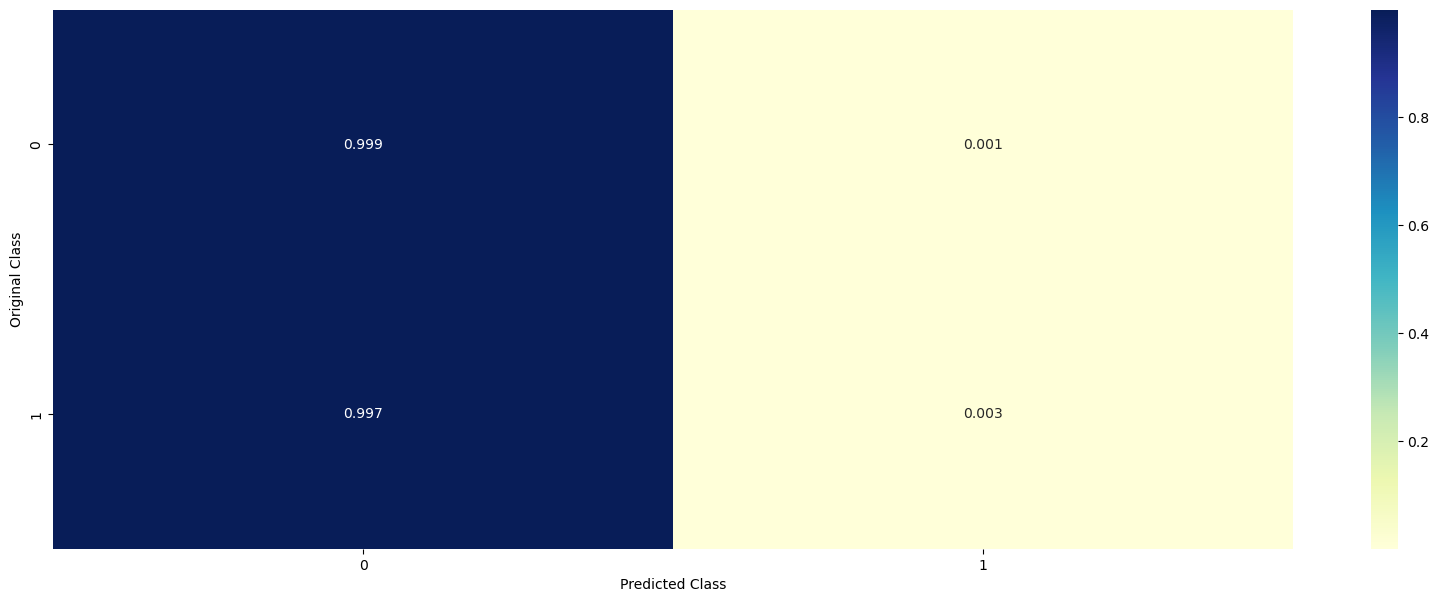

In [69]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_X, train_y, val_X, val_y, clf)

### 3.2. Without Class balancing

#### 3.2.1. Hyper paramter tuning

for alpha = 1e-06
F1_score: 0.0
for alpha = 1e-05
F1_score: 0.0
for alpha = 0.0001
F1_score: 0.0
for alpha = 0.001
F1_score: 0.0
for alpha = 0.01
F1_score: 0.0
for alpha = 0.1
F1_score: 0.0
for alpha = 1
F1_score: 0.0020898641588296763


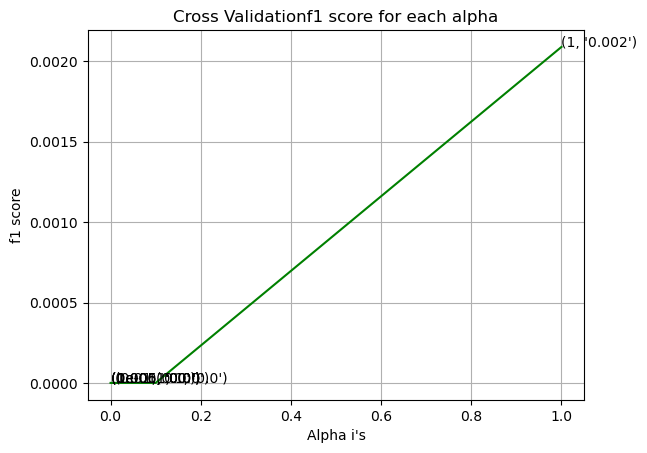

For values of best alpha =  1 The train f1_score is: 0.006080567519635166
For values of best alpha =  1 The cross-validation f1_score is: 0.0020898641588296763


In [70]:
alpha = [10 ** x for x in range(-6, 1)]
F1_score_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_X, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X, train_y)
    sig_clf_probs = sig_clf.predict(val_X)
    F1_score_array.append(f1_score(val_y, sig_clf_probs))
    print("F1_score:", f1_score(val_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, F1_score_array,c='g')
for i, txt in enumerate(np.round(F1_score_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],F1_score_array[i]))
plt.grid()
plt.title("Cross Validationf1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()


best_alpha = np.argmax(F1_score_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)

predict_y = sig_clf.predict(train_X)
print('For values of best alpha = ', alpha[best_alpha], "The train f1_score is:", f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best alpha = ', alpha[best_alpha], "The cross-validation f1_score is:", f1_score(val_y, predict_y))

#### 3.2.2. Testing model with best hyper parameters

F-1 score : 0.0020898641588296763
Number of mis-classified points : 0.21142351117998673
-------------------- Confusion matrix --------------------


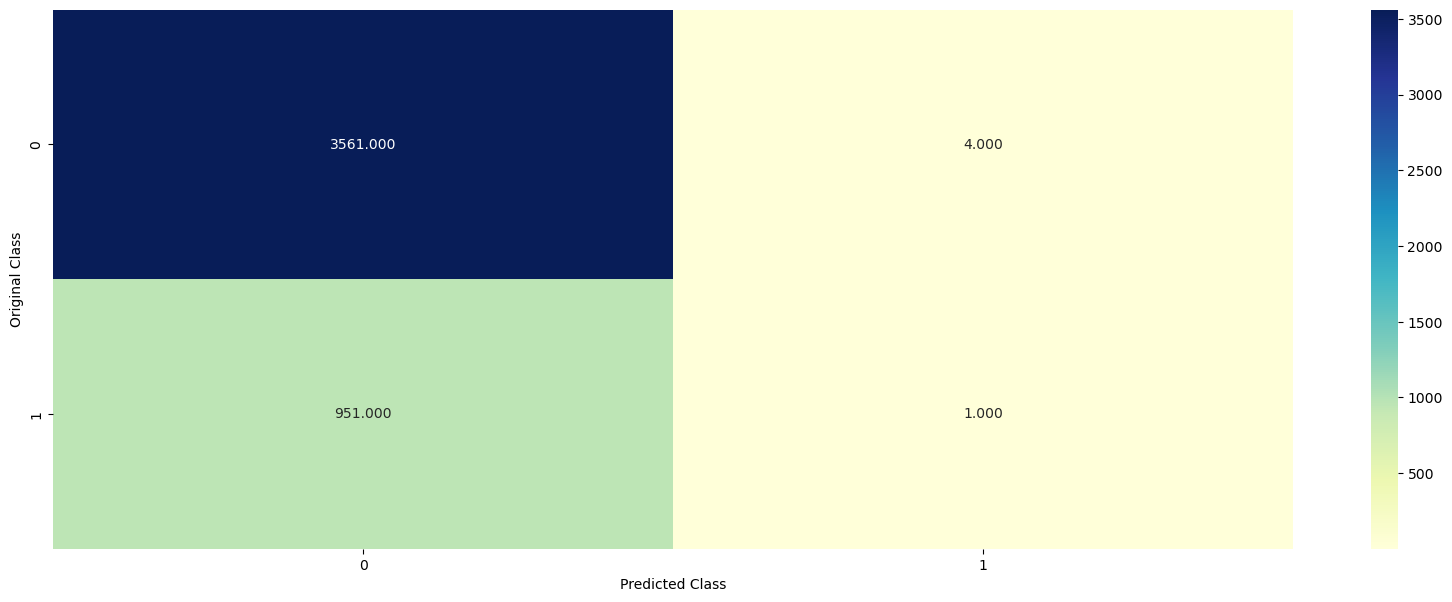

-------------------- Precision matrix (Columm Sum=1) --------------------


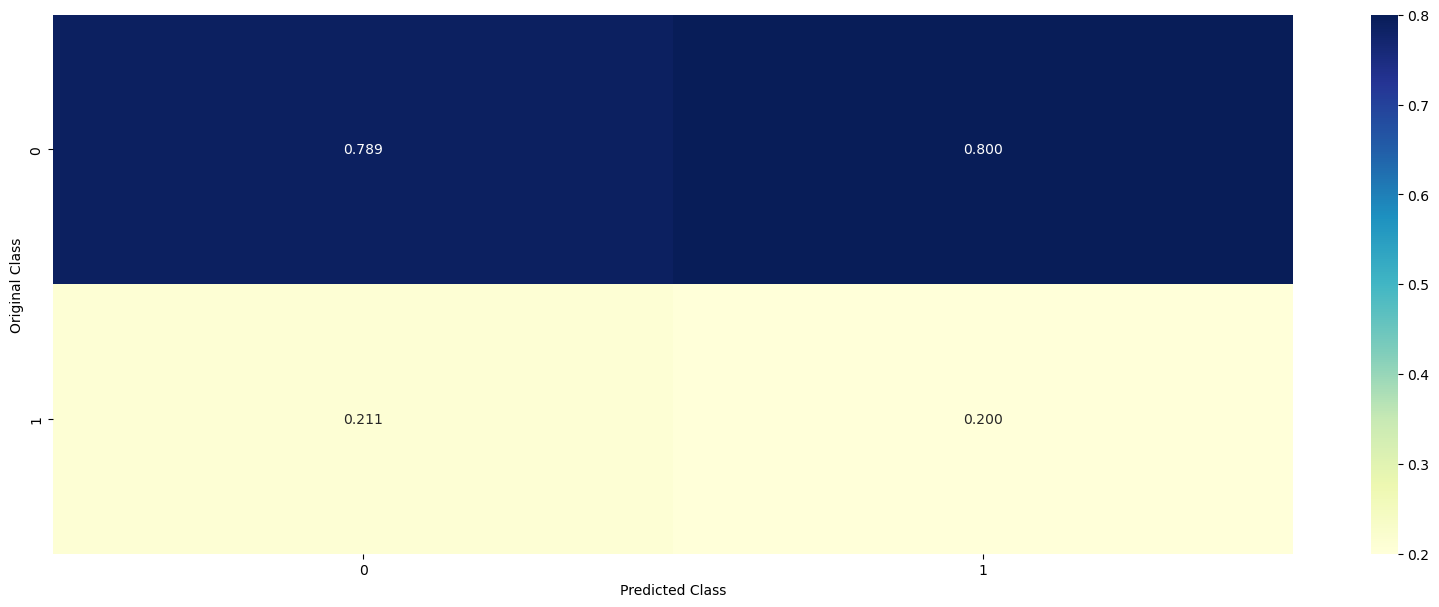

-------------------- Recall matrix (Row sum=1) --------------------


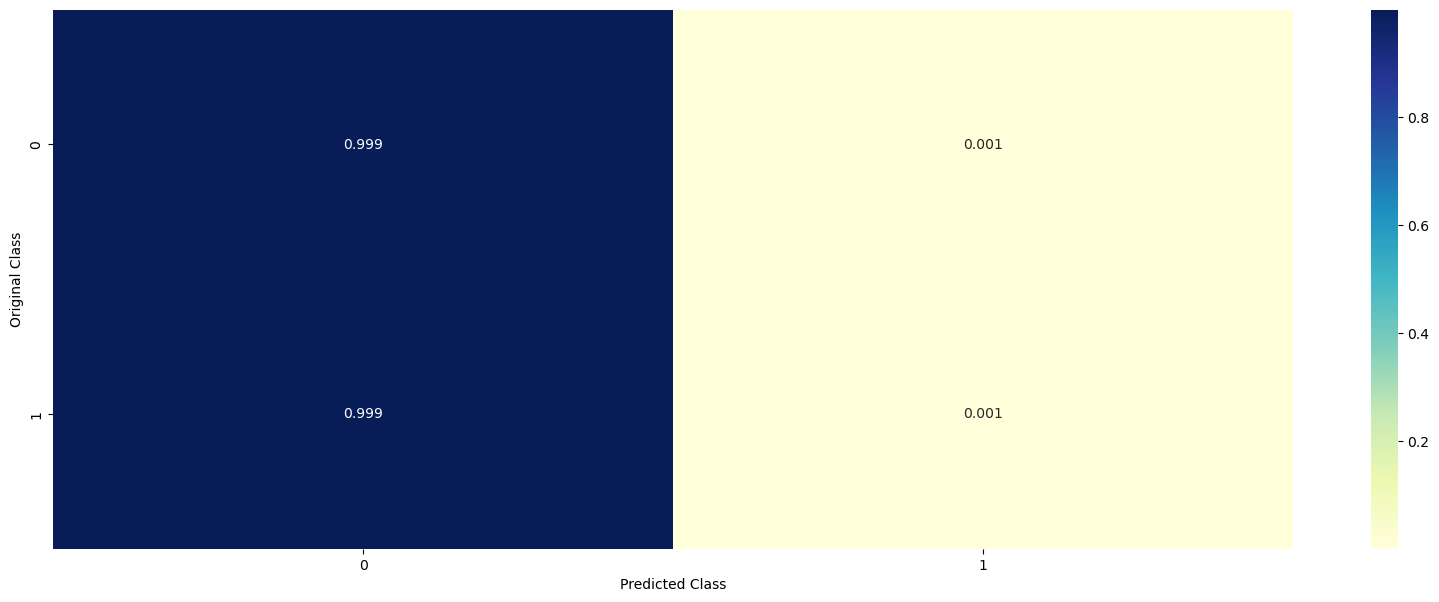

In [71]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_X, train_y, val_X, val_y, clf)

## 4. Linear Support Vector Machines

#### 4.1. Hyper paramter tuning

for C = 1e-05
F1_score: 0.0
for C = 0.0001
F1_score: 0.0
for C = 0.001
F1_score: 0.0
for C = 0.01
F1_score: 0.0
for C = 0.1
F1_score: 0.0
for C = 1
F1_score: 0.0041753653444676405
for C = 10
F1_score: 0.006250000000000001
for C = 100
F1_score: 0.006250000000000001


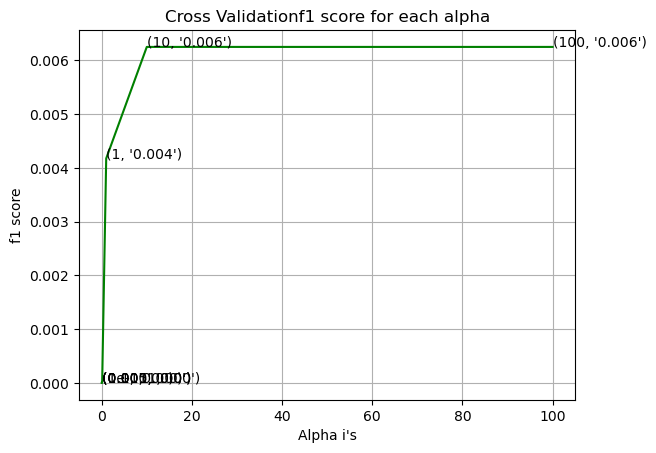

For values of best alpha =  10 The train f1_score is: 0.007594936708860758
For values of best alpha =  10 The cross-validation f1_score is: 0.006250000000000001


In [72]:
alpha = [10 ** x for x in range(-5, 3)]
F1_score_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_X, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_X, train_y)
    sig_clf_probs = sig_clf.predict(val_X)
    F1_score_array.append(f1_score(val_y, sig_clf_probs))
    print("F1_score:", f1_score(val_y, sig_clf_probs))  

fig, ax = plt.subplots()
ax.plot(alpha, F1_score_array,c='g')
for i, txt in enumerate(np.round(F1_score_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],F1_score_array[i]))
plt.grid()
plt.title("Cross Validationf1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("f1 score")
plt.show()


best_alpha = np.argmax(F1_score_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)

predict_y = sig_clf.predict(train_X)
print('For values of best alpha = ', alpha[best_alpha], "The train f1_score is:", f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best alpha = ', alpha[best_alpha], "The cross-validation f1_score is:", f1_score(val_y, predict_y))

#### 4.2. Testing model with best hyper parameters

F-1 score : 0.006250000000000001
Number of mis-classified points : 0.21120212530440557
-------------------- Confusion matrix --------------------


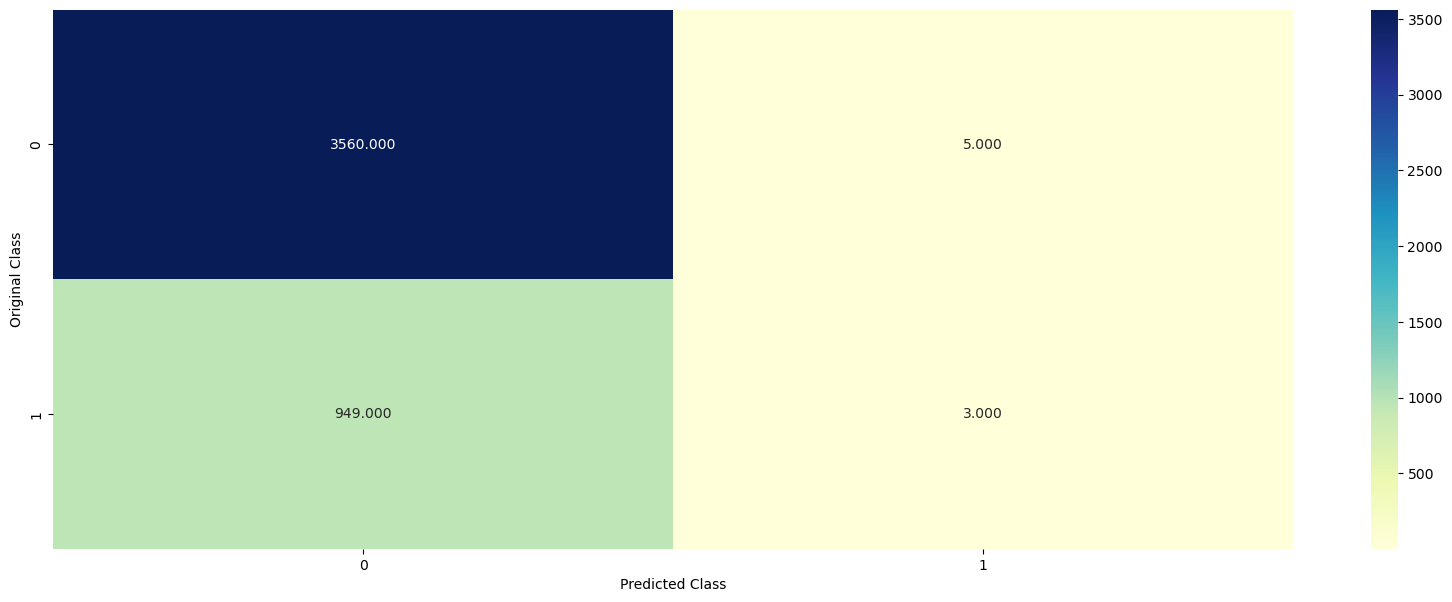

-------------------- Precision matrix (Columm Sum=1) --------------------


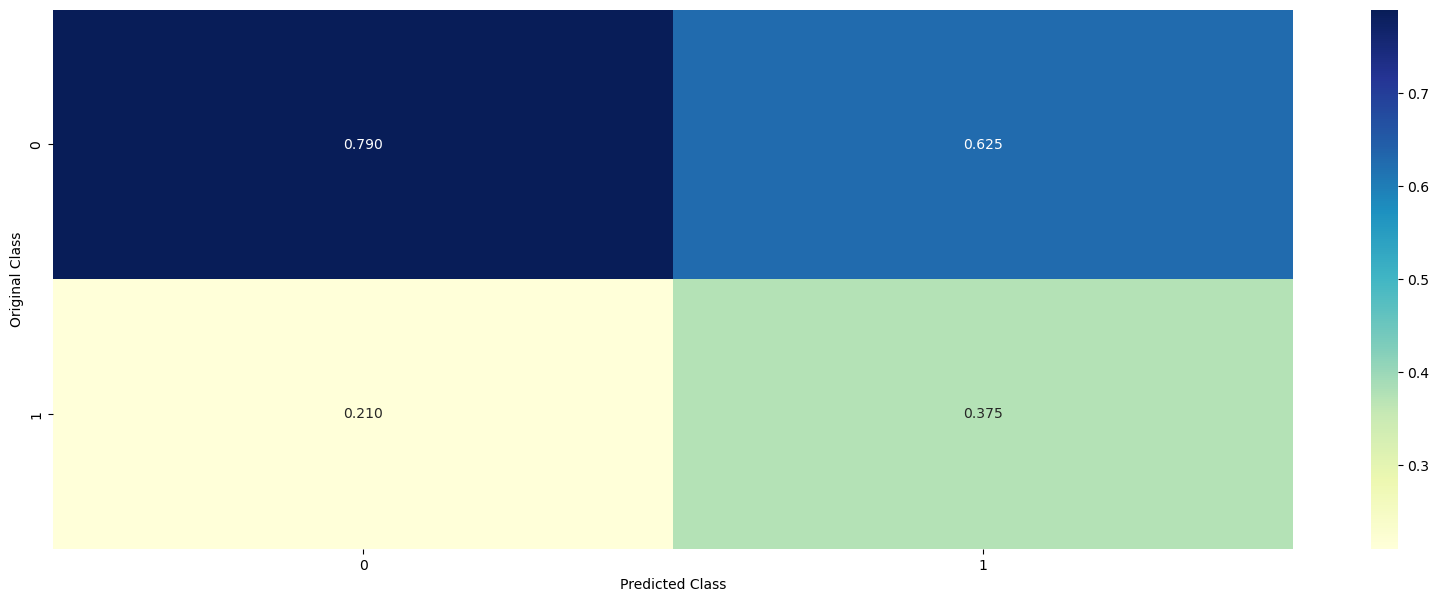

-------------------- Recall matrix (Row sum=1) --------------------


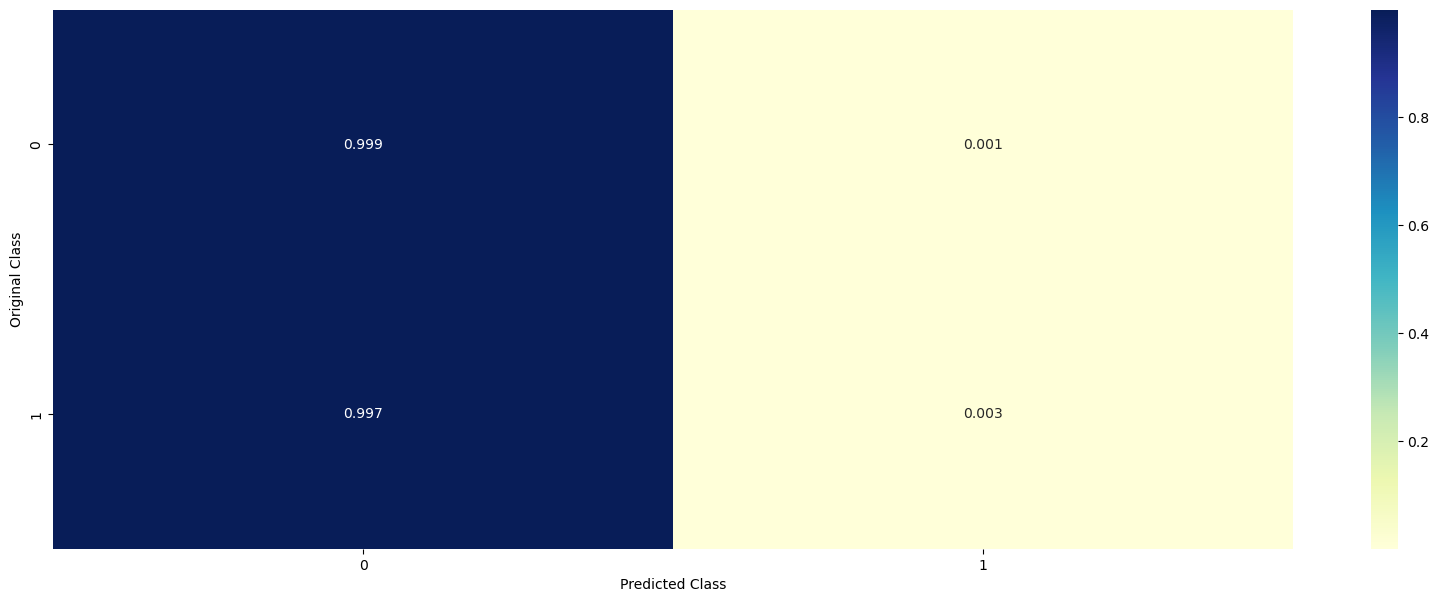

In [73]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_X, train_y,val_X,val_y, clf)

## 5. Random Forest Classifier

#### 5.1. Hyper paramter tuning 

In [52]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
F1_score_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_X, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_X, train_y)
        sig_clf_probs = sig_clf.predict(val_X)
        F1_score_array.append(f1_score(val_y, sig_clf_probs))
        print("F1_score:", f1_score(val_y, sig_clf_probs))  


best_alpha = np.argmax(F1_score_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)

predict_y = sig_clf.predict(train_X)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train f1 score is:",f1_score(train_y, predict_y))
predict_y = sig_clf.predict(val_X)
print('For values of best estimator = ', alpha[int(best_alpha/2)], f1_score(val_y, predict_y))

for n_estimators = 100 and max depth =  5
F1_score: 0.5608974358974359
for n_estimators = 100 and max depth =  10
F1_score: 0.558066211245402
for n_estimators = 200 and max depth =  5
F1_score: 0.5605979711692471
for n_estimators = 200 and max depth =  10
F1_score: 0.5645076355976831
for n_estimators = 500 and max depth =  5
F1_score: 0.5649178590355062
for n_estimators = 500 and max depth =  10
F1_score: 0.5675249605885444
for n_estimators = 1000 and max depth =  5
F1_score: 0.5646186440677965
for n_estimators = 1000 and max depth =  10
F1_score: 0.5670699631772752
for n_estimators = 2000 and max depth =  5
F1_score: 0.5673534072900159
for n_estimators = 2000 and max depth =  10
F1_score: 0.5660178853235139
For values of best estimator =  500 The train f1 score is: 0.8322805208199046
For values of best estimator =  500 0.5675249605885444


#### 5.2. Testing model with best hyper parameters 

F-1 score : 0.5675249605885444
Number of mis-classified points : 0.42205128205128206
-------------------- Confusion matrix --------------------


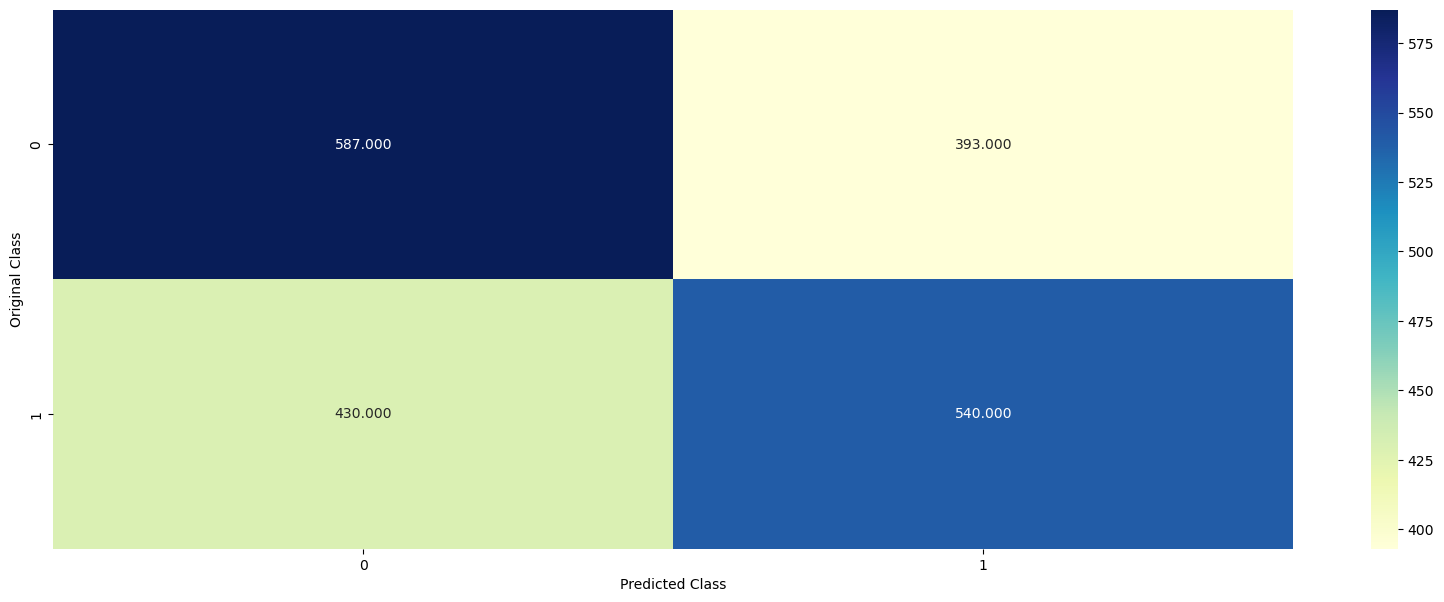

-------------------- Precision matrix (Columm Sum=1) --------------------


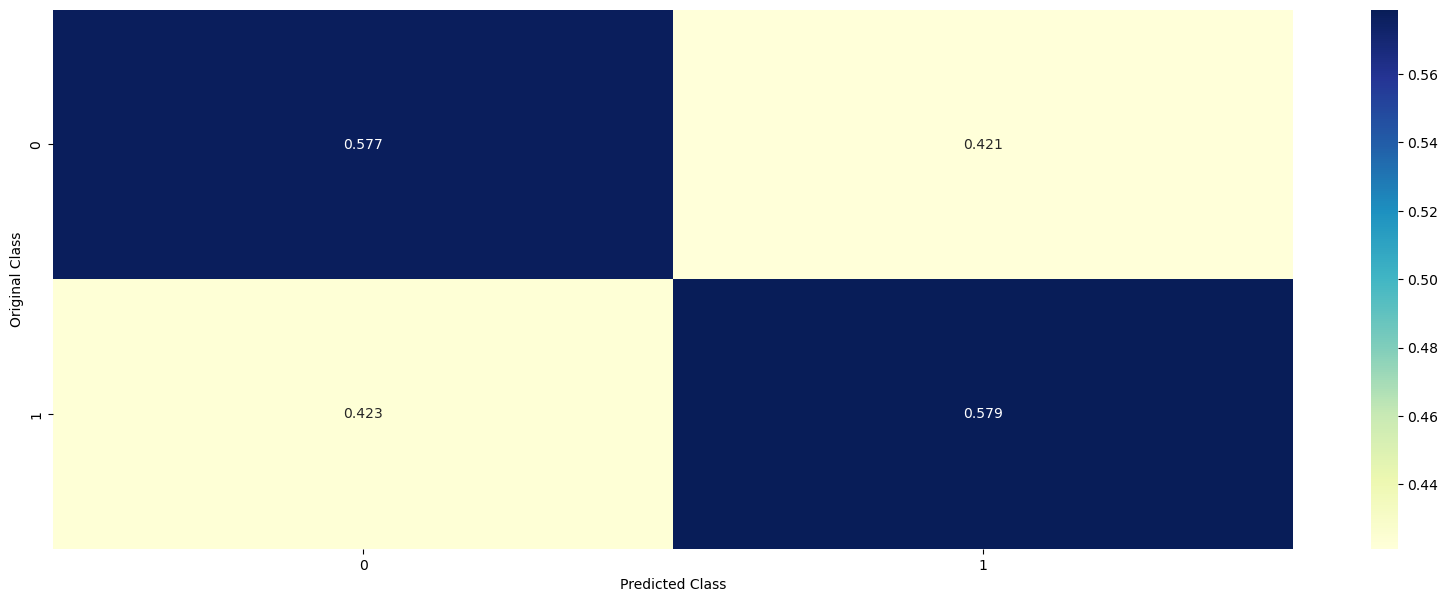

-------------------- Recall matrix (Row sum=1) --------------------


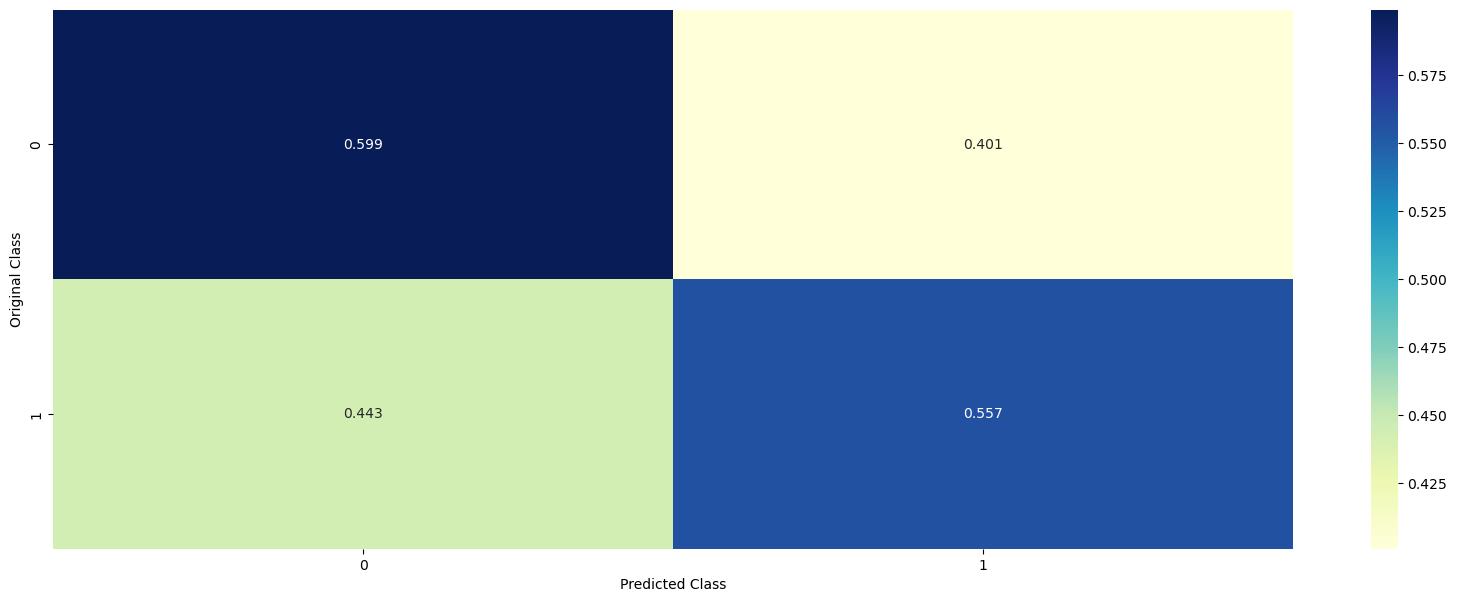

In [63]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_X, train_y,val_X,val_y, clf)

## 6.Stack the models

#### 6.1 testing with hyper parameter tuning

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score

clf1 = SGDClassifier(alpha=1e-06, penalty='l2', loss='log', class_weight='balanced', random_state=42)
clf1.fit(train_X, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.1, penalty='l2', loss='hinge', class_weight='balanced', random_state=42)
clf2.fit(train_X, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf3.fit(train_X, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_X, train_y)
print("Logistic Regression: f1 score: %0.2f" % (f1_score(val_y, sig_clf1.predict(val_X))))
sig_clf2.fit(train_X, train_y)
print("Support Vector Machines: f1 score: %0.2f" % (f1_score(val_y, sig_clf2.predict(val_X))))
sig_clf3.fit(train_X, train_y)
print("Random Forest: f1 score: %0.2f" % (f1_score(val_y, sig_clf3.predict(val_X))))
print("-" * 50)

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]
best_f1_score = 0
best_alpha = None

for a in alpha:
    lr = LogisticRegression(C=a)
    sclf = StackingClassifier(estimators=[('sig_clf1', sig_clf1), ('sig_clf2', sig_clf2), ('sig_clf3', sig_clf3)], 
                              final_estimator=lr, stack_method='predict_proba')
    sclf.fit(train_X, train_y)
    f1 = f1_score(val_y, sclf.predict(val_X))
    print("Stacking Classifier for alpha=%f: f1 score: %0.2f" % (a, f1))
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_alpha = a

print("Best alpha: %f, Best F1 score: %0.2f" % (best_alpha, best_f1_score))


Logistic Regression: f1 score: 0.66
Support Vector Machines: f1 score: 0.57
Random Forest: f1 score: 0.57
--------------------------------------------------
Stacking Classifier for alpha=0.000100: f1 score: 0.66
Stacking Classifier for alpha=0.001000: f1 score: 0.63
Stacking Classifier for alpha=0.010000: f1 score: 0.57
Stacking Classifier for alpha=0.100000: f1 score: 0.57
Stacking Classifier for alpha=1.000000: f1 score: 0.57
Stacking Classifier for alpha=10.000000: f1 score: 0.57
Best alpha: 0.000100, Best F1 score: 0.66


#### 6.2 testing the model with the best hyper parameters

In [82]:
lr = LogisticRegression(C=0.0001)
sclf = StackingClassifier(estimators=[('sig_clf1', sig_clf1), ('sig_clf2', sig_clf2), ('sig_clf3', sig_clf3)], 
                          final_estimator=lr, stack_method='predict_proba')
sclf.fit(train_X, train_y)

train_f1 = f1_score(train_y, sclf.predict(train_X))
print("f1_score (train) on the stacking classifier:", train_f1)

val_f1 = f1_score(val_y, sclf.predict(val_X))
print("f1_score (CV) on the stacking classifier:", val_f1)

misclassified = np.count_nonzero((sclf.predict(val_X) - val_y)) / val_y.shape[0]
print("Number of misclassified points:", misclassified)

plot_confusion_matrix(val_y, sclf.predict(val_X))


TypeError: 'numpy.float64' object is not callable

## Prediction on test data

In [53]:
clf = SGDClassifier(class_weight='balanced', alpha=1e-06, penalty='l2', loss='log', random_state=42)
clf.fit(train_X, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_X, train_y)
sig_clf_probs = sig_clf.predict(val_X)
f1_score(val_y, sig_clf_probs)

0.6643835616438356

In [55]:
#predicting values on given test data
y_test=sig_clf.predict(X_test)

In [56]:
resultSclf = pd.DataFrame(y_test, columns = ['pred'])

In [57]:
resultSclf.to_csv("SatishSclf.csv", index=False)

In [58]:
resultSclf.value_counts()

pred
1       3986
dtype: int64